In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

2024-04-16 15:46:47.245028: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 15:46:47.404006: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 15:46:47.702760: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 15:46:50.230819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]


pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - pixel_means)/pixel_stds
X_valid_scaled = (X_valid - pixel_means)/pixel_stds
X_test_scaled = (X_test - pixel_means)/pixel_stds

In [3]:
# def build_model(seed=2024):
#     tf.random.set_seed(seed)
#     model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=[28, 28]),
#         tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
#         tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
#         tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
#         tf.keras.layers.Dense(10, activation="softmax")    
#     ])
#     return model

# def build_and_train_model(optimizer):
#     model = build_model()
#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer= optimizer,
#         metrics = ["accuracy"]
#     )

#     history = model.fit(X_train_scaled, y_train, epochs=5,
#                     validation_data= (X_valid_scaled, y_valid))
#     return history

    

In [4]:
# optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)#, momentum = 0.9)


In [5]:
# history_sgd = build_and_train_model(optimizer)

# Faster Optimizers

In [10]:
tf.random.set_seed(2024)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")    
])

# 1
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
# 2
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

# 3 nesterov
optimizer = tf.keras.Optimizers.SGD(learning_rate = 0.001, momentum = 0.9, nesterov=True)

# 4 AdaGrad
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer= optimizer,
    metrics = ["accuracy"]
)

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data= (X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5143 - loss: 1.4654 - val_accuracy: 0.7632 - val_loss: 0.6551
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7747 - loss: 0.6411 - val_accuracy: 0.8032 - val_loss: 0.5406
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8082 - loss: 0.5398 - val_accuracy: 0.8200 - val_loss: 0.4915
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8263 - loss: 0.4892 - val_accuracy: 0.8314 - val_loss: 0.4629
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8371 - loss: 0.4572 - val_accuracy: 0.8382 - val_loss: 0.4438


# Learning rate scheduling

## Performance scheduling

In [12]:
lr0 = 0.01

tf.random.set_seed(2024)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")    
])

optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer= optimizer,
    metrics = ["accuracy"]
)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

history = model.fit(
    X_train_scaled, y_train, epochs=100,
    validation_data = (X_valid_scaled, y_valid),
    callbacks = [lr_schedule]
)

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7432 - loss: 0.7427 - val_accuracy: 0.8444 - val_loss: 0.4223 - learning_rate: 0.0100
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8580 - loss: 0.3993 - val_accuracy: 0.8614 - val_loss: 0.3778 - learning_rate: 0.0100
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8759 - loss: 0.3508 - val_accuracy: 0.8672 - val_loss: 0.3572 - learning_rate: 0.0100
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8853 - loss: 0.3205 - val_accuracy: 0.8706 - val_loss: 0.3462 - learning_rate: 0.0100
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8932 - loss: 0.2986 - val_accuracy: 0.8760 - val_loss: 0.3391 - learning_rate: 0.0100
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9003 - loss: 0.2791 - val_accuracy: 0.8770 - val_loss: 0.3343 - learning_rate: 0.0100
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9

<Axes: >

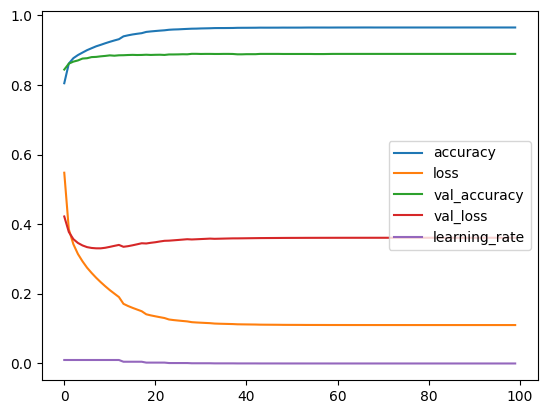

In [17]:
pd.DataFrame(history.history).plot()

<Axes: >

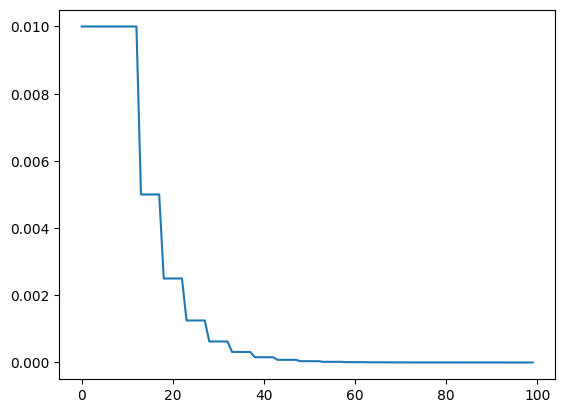

In [19]:
pd.DataFrame(history.history)['learning_rate'].plot()

# Avoiding overfitting

## l1 or l2 regularization

In [ ]:
lr0 = 0.01

tf.random.set_seed(2024)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal",
                          kernel_regularization=tf.keras.regularizers.l1_l2(0.1, 0.01)),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal",
                          kernel_regularization=tf.keras.regularizers.l1_l2(0.1, 0.01)),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal",
                          kernel_regularization=tf.keras.regularizers.l1_l2(0.1, 0.01)),
    tf.keras.layers.Dense(10, activation="softmax")    
])

optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer= optimizer,
    metrics = ["accuracy"]
)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

history = model.fit(
    X_train_scaled, y_train, epochs=100,
    validation_data = (X_valid_scaled, y_valid),
    callbacks = [lr_schedule]
)

## Dropout

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(10, activation="softmax")    
])